# Lecture 5
<!-- ToC -->

-Histograms: [>>](#Histograms)  
--What we saw last week: [>>](#What-we-saw-last-week)  
-Plotting a histogram: [>>](#Plotting-a-histogram)  
--A detail: [>>](#A-detail)  
--Another plot: [>>](#Another-plot)  
--Effects of bin width in histograms: [>>](#Effects-of-bin-width-in-histograms)  
-Functions in Python: [>>](#Functions-in-Python)  
--Built-in functions: [>>](#Built-in-functions)  
--Numpy functions: [>>](#Numpy-functions)  
-Writing functions: [>>](#Writing-functions)  
-Python flow control: [>>](#Python-flow-control)  
--For loop: [>>](#For-loop)  
--Loops and slices: [>>](#Loops-and-slices)  
--Alternative forms of the for loop: [>>](#Alternative-forms-of-the-for-loop)  
--While statement: [>>](#While-statement)  
--If statement: [>>](#If-statement)  

## Histograms

### What we saw last week

As we have seen before, import `numpy` and `matplotlib.pyplot`, and use the *line magic* `%matplotlib inline` to ensure plots appear in the Notebook!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
poisson_array = np.loadtxt('poissonDistArr.csv')
print(" ")
print("poisson_array \n",poisson_array)

 
poisson_array 
 [ 3.  6.  4.  6.  4.  3.  4.  3.  5.  3.  3.  4.  3.  4.  3.  2.  8.  2.
  5.  6.  6.  6.  7.  8.  4.  7.  5.  6.  2.  5.  6.  4.  4.  3.  0.  6.
  5.  3.  5.  4.  2.  7.  2.  1.  2.  4.  5.  5.  4.  5.  4.  2.  1.  5.
  7.  3.  4. 10.  4.  2.  4.  6.  5.  5.  7.  5.  1.  7.  7.  3.  5.  2.
  2.  3.  6.  6.  7.  3.  6.  3.  3.  3.  4.  3.  8.  5.  4.  2.  6.  9.
  7.  2.  4.  6.  6.  3.  4.  4.  6.  3.  5.  5.  5.  5.  5.  2.  1.  8.
  4.  4.  7.  6.  6.  7.  6.  7.  5.  4.  3.  5.  4.  3.  5.  2.  1.  5.
  7.  3.  2.  4.  7.  7.  5.  9.  3.  6.  5.  8.  5.  2.  7.  3.  3.  2.
  4.  5.  5.  6.  6.  4. 12.  8.  4.  6.  2.  3.  1.  5.  3.  5.  6.  1.
  5.  5.  4.  3.  2.  8.  5.  1.  1.  6.  5.  6.  2.  9.  4.  5.  4.  9.
  6.  8.  2.  2.  7.  2.  6.  6.  5.  5.  2.  2.  1.  6.  2.  3.  2.  5.
  8.  5.  3.  3.  1.  1.  8.  4.  5.  7.  4.  9.  4.  5.  6.  0.  6.  6.
  5.  2.  8.  2.  4.  4.  4.  4.  3.  7.  8.  1.  7.  6.  5.  0.  4.  4.
  4.  2.  4.  5.  3.  6.  1.  4. 

## Plotting a histogram

The histogram shows how often numbers occur in our array, or, more precisely, how often numbers occur within particular ranges. Use Numpy to define the edges of the ranges ("bins") in which we will count up the occurrences.

In [3]:
bin_bot = -1.0
bin_top = 14.0
bin_number = 15
bin_edges, bin_width = np.linspace(bin_bot, bin_top, bin_number + 1, retstep = True)
print(" ")
print("Histogram bins start at",bin_bot,"finish at",bin_top)
print("Number of bins is",bin_number,"and width of bins is",bin_width)
print("The bin edges are:\n",bin_edges)

 
Histogram bins start at -1.0 finish at 14.0
Number of bins is 15 and width of bins is 1.0
The bin edges are:
 [-1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


Calculate some statistics.

In [4]:
#
# the number of entries in the array
n_events = len(poisson_array) 
#
# calculate arithmetic mean of numbers in array
mu = np.mean(poisson_array) 
#
# calculate standard deviation (error on a single value - you have looked at this in Phys107!)
sigma = np.std(poisson_array) 
#
# calculate error of mean
mu_error = sigma/np.sqrt(n_events) 
print(" ")
print("Number of entries in array is",n_events)
print("Mean is",mu,"+-",mu_error)
print("Standard deviation is",sigma)

 
Number of entries in array is 1000
Mean is 4.531 +- 0.06640059487685333
Standard deviation is 2.099771178009642


If we wrote this down in a practical, we would have some unhappy demonstrators. So here's a first quick look at how we can improve the print statements, using *format strings* or *f-strings*!

In [5]:
print(" ")
print(f"Number of entries in array is {n_events}.")
print(f"Mean is {mu:.2f} +- {mu_error:.2f}.")
print(f"Standard deviation is {sigma:.2f}.")

 
Number of entries in array is 1000.
Mean is 4.53 +- 0.07.
Standard deviation is 2.10.


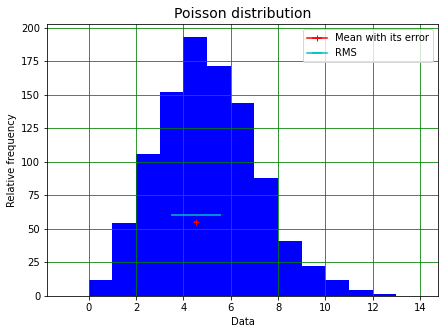

In [6]:
#
# y coordinate at which to plot mean
y_mu = 1.1*n_events/20 
#
# y coordinate at which to plot RMS
y_sigma = 1.2*n_events/20 
#
plt.figure(figsize = (7, 5))
plt.title('Poisson distribution', fontsize = 14)
plt.xlabel('Data')
plt.ylabel('Relative frequency')
plt.hist(poisson_array, bins = bin_edges, color = 'b')
plt.errorbar(mu, y_mu, xerr = mu_error, marker = '+', color = 'r', label = 'Mean with its error')
plt.errorbar(mu, y_sigma, xerr = sigma/2, marker = '', color = 'c', label = 'RMS')
plt.grid(color = 'g')
plt.legend()
plt.show()

### A detail

Note how the line showing the size of the RMS is plotted. As `xerr` is used to show quantities like $\mu \pm \mu_{error}$, the total length of the line showing the error is $2\mu_{error}$ (one $\mu_{error}$ above and one below the central value). If we want to use `xerr` to plot a line of length $\sigma$ with $\mu$ at its centre, we must plot half of the RMS $(\sigma/2)$ above the central value and half below.

### Another plot
An alternative way of plotting the line indicating the RMS is shown in the following cell.

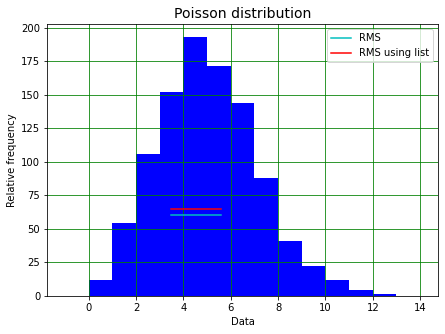

In [7]:
#
# Arrays containing end-points of RMS line
x_RMS = np.array([mu - sigma/2, mu + sigma/2])
y_RMS = np.array([y_sigma, y_sigma])
#
plt.figure(figsize = (7, 5))
plt.title('Poisson distribution', fontsize = 14)
plt.xlabel('Data')
plt.ylabel('Relative frequency')
plt.hist(poisson_array, bins = bin_edges, color = 'b')
#
# Draw line using RMS end-point arrays in 'plt.plot'
plt.plot(x_RMS, y_RMS, marker = '', color = 'c', label = 'RMS')
#
# Can also use lists to define the x and y values in 'plt.plot'; use new y value so can see both RMS lines!
y_sigma_new = 1.3*n_events/20 
plt.plot([mu - sigma/2, mu + sigma/2], [y_sigma_new, y_sigma_new], marker = '', color = 'r', label = 'RMS using list')
#
plt.grid(color = 'g')
plt.legend()
plt.show()

### Effects of bin width in histograms

Look first at the numbers drawn from a Poisson distribution in the `poisson_array` above. Note, these are all integer values (although they are represented as real numbers here - because that's the Numpy default!).

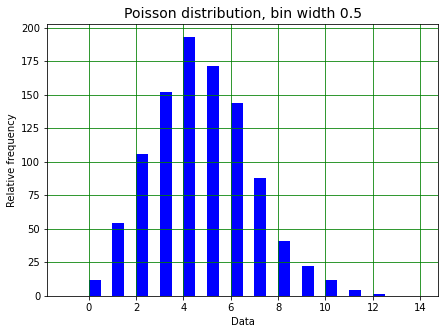

In [8]:
bin_bot = -1.0
bin_top = 14.0
bin_number = 30
bin_edges, bin_width = np.linspace(bin_bot, bin_top, bin_number + 1, retstep = True)
#
plt.figure(figsize = (7, 5))
plt.title('Poisson distribution, bin width ' + str(bin_width), fontsize = 14)
plt.xlabel('Data')
plt.ylabel('Relative frequency')
plt.hist(poisson_array, bins = bin_edges, color = 'b')
plt.grid(color = 'g')
plt.show()

Look at a triangular distribution as an example for a distribution containing floats (real numbers).

In [9]:
triangle_array = np.loadtxt('triangleDistArr.csv')
n_plot = 100
print(" ")
print("First",n_plot,"entries in triangle_array: \n", triangle_array[0:n_plot])

 
First 100 entries in triangle_array: 
 [3.42270998 1.50000018 4.54723958 9.56333691 3.70920304 4.0350516
 3.79709654 2.61050528 2.47534894 4.39091454 3.47972353 8.31760472
 9.39960903 4.14318103 2.17589416 2.86072403 3.8509043  4.8599877
 5.59636802 0.93859185 7.96941263 3.48327613 5.92730479 4.93773275
 4.98444858 2.4048588  0.31143644 6.6443638  6.55949557 0.54321913
 1.19135625 7.47845973 3.42947395 4.40944915 2.74208465 3.61447888
 8.9898208  1.67812173 4.78104148 5.3456935  7.93794701 3.34031007
 4.69363447 5.50194789 3.13033626 6.62140044 6.93219315 7.36509974
 0.91238332 4.80647923 7.393632   4.10596663 3.11315157 9.24419354
 3.80923248 5.19190739 7.03467767 4.28923692 4.75468468 1.01264103
 4.18717193 7.83143009 2.38604016 4.84674895 5.58182481 5.15183149
 2.73564797 3.7788022  7.26491833 1.00783321 5.39289853 4.73521589
 5.40528462 1.97553058 3.30746211 1.39147539 0.8462459  3.36626957
 5.98260299 5.08381204 3.23770275 4.26604267 4.15426704 1.44106924
 6.31845577 5.38838138 

We can set the precision of the printout for Numpy arrays as follows:

In [10]:
np.set_printoptions(precision = 3)
print("First",n_plot,"entries in triangle_array: \n", triangle_array[0:n_plot])

First 100 entries in triangle_array: 
 [3.423 1.5   4.547 9.563 3.709 4.035 3.797 2.611 2.475 4.391 3.48  8.318
 9.4   4.143 2.176 2.861 3.851 4.86  5.596 0.939 7.969 3.483 5.927 4.938
 4.984 2.405 0.311 6.644 6.559 0.543 1.191 7.478 3.429 4.409 2.742 3.614
 8.99  1.678 4.781 5.346 7.938 3.34  4.694 5.502 3.13  6.621 6.932 7.365
 0.912 4.806 7.394 4.106 3.113 9.244 3.809 5.192 7.035 4.289 4.755 1.013
 4.187 7.831 2.386 4.847 5.582 5.152 2.736 3.779 7.265 1.008 5.393 4.735
 5.405 1.976 3.307 1.391 0.846 3.366 5.983 5.084 3.238 4.266 4.154 1.441
 6.318 5.388 2.402 3.67  7.44  3.966 2.572 1.764 6.043 2.194 4.379 9.37
 3.262 7.078 9.158 3.14 ]


Now draw the triangle describing the distribution and plot a histogram of the numbers in `triangle_array`.

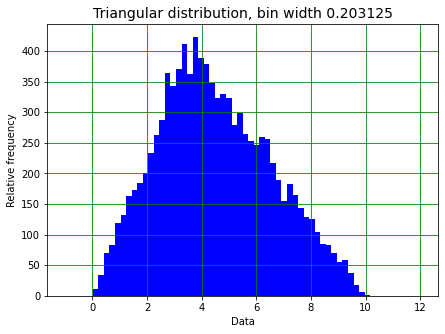

In [11]:
n_events = len(triangle_array) 
#
# Parameters describing triangle
left = 0.0
mode = 3.5
right = 10.0
#
# Define histogram bins
bin_bot = -1.0
bin_top = 12.0
bin_number = 64
bin_edges, bin_width = np.linspace(bin_bot, bin_top, bin_number + 1, retstep = True)
#
plt.figure(figsize = (7, 5))
plt.title('Triangular distribution, bin width ' + str(bin_width), fontsize = 14)
plt.xlabel('Data')
plt.ylabel('Relative frequency')
plt.hist(triangle_array, bins = bin_edges, color = 'b')
plt.grid(color = 'g')
plt.show()

## Functions in Python

### Built-in functions
We have already seen how we can use functions in Python. Some of these are part of the language, called *built-in* functions.

In [12]:
print(" ")
x = -3.14
abs_x = abs(x)
print(f"x = {x} and the absolute value of x is {abs_x}.")

 
x = -3.14 and the absolute value of x is 3.14.


A complete list of these functions is given at: https://docs.python.org/3/library/functions.html.
As these are part of the language, they do not require that any packages are loaded before they are used. 

### Numpy functions
We have also seen examples of functions that are part of the Numpy package.

In [13]:
import numpy as np
#
exp_x = np.exp(x)
print(f"x = {x:.3f} and the exponential of x is {exp_x:.3f}.")

x = -3.140 and the exponential of x is 0.043.


Mathematical functions are also available in the Math package

In [14]:
import math
exp_x = math.exp(x)
print(f"x = {x} and the exponential of x is {exp_x:.3f}.")

x = -3.14 and the exponential of x is 0.043.


There is a difference between the Math and Numpy functions; Maths functions will not take arrays as arguments:

In [15]:
x_array = np.linspace(1.1, 13.2, 3)
math_exp_x_array = math.exp(x_array)

TypeError: only size-1 arrays can be converted to Python scalars

Numpy functions will.

In [16]:
exp_x_array = np.exp(x_array)
print(f"x = {x_array} and the exponentials of x (respectively) are {exp_x_array}.")

x = [ 1.1   7.15 13.2 ] and the exponentials of x (respectively) are [3.004e+00 1.274e+03 5.404e+05].


For this reason, we will always use the Numpy versions of mathematical functions!

## Writing functions

We can also easily create functions in Python. For example, the following function calculates the area of a triangle.

In [17]:
def triangle_area(base, height):
    area = 0.5*base*height
    return area

Once we have defined, we can use it as follows:

In [18]:
b = 4 # mm
h = 5 # mm
a = triangle_area(b, h)
print(f"Area of triangle with base {b:.2f} mm and height {h:.2f} mm is {a:.2f} mm^2.")

Area of triangle with base 4.00 mm and height 5.00 mm is 10.00 mm^2.


We can use a function to calculate more than one value:

In [19]:
def circle_properties(radius):
    area = np.pi*radius**2
    perimeter = 2*np.pi*radius
    return area, perimeter
#
r = 5 # mm
a, p = circle_properties(r)
print(f"Area of circle with radius {r:.2f} mm is {a:.2f} mm^2, perimeter is {p:.2f} mm.")

Area of circle with radius 5.00 mm is 78.54 mm^2, perimeter is 31.42 mm.


We could write the output of the function into a tuple.

In [20]:
props = circle_properties(r)
print(f"Area of circle with radius {r:.2f} mm is {props[0]:.2f} mm^2, perimeter is {props[1]:.2f} mm.")
print(f"Properties of circle with radius {r:.2f} mm are \n{props}.")

Area of circle with radius 5.00 mm is 78.54 mm^2, perimeter is 31.42 mm.
Properties of circle with radius 5.00 mm are 
(78.53981633974483, 31.41592653589793).


As it's a tuple, we can't alter the values in `prop`. 

In [21]:
props[0] = 0.9

TypeError: 'tuple' object does not support item assignment

Do these functions allow arrays to be used?

In [22]:
r_array = np.linspace(2, 3, 3)
a_array, p_array = circle_properties(r_array) 
print(f"Areas of circles with radii {r_array} mm are {a_array} mm^2 and perimeters are {p_array} mm, respectively.")

Areas of circles with radii [2.  2.5 3. ] mm are [12.566 19.635 28.274] mm^2 and perimeters are [12.566 15.708 18.85 ] mm, respectively.


Yes! This shows some of the power of using Numpy and Python programs.

Note that you do have to use Numpy arrays to make this "vector processing" work. Look what happens if we try and use a list of values instead of an array:

In [23]:
r_list = [2.0, 2.5, 3.0]
a_list, p_list = circle_properties(r_list) 
print(f"Areas of circles with radii {r_list} mm are {a_list} mm^2 and perimeters are {p_list} mm, respectively.")

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'